Notebook is copyright &copy; of <a href="https://ajaytech.co"/> Ajay Tech </a>

# Logistic Regression

## Contents

- [What is Logistic Regression](#What-is-Logistic-Regression)
- [Math](#Math)
  - [logit function](#logit-function)
  - [sigmoid function](#sigmoid-function)
- [Implementation](#Implementation)
  - [Dataset](#Dataset)
  - [Modeling](#Modeling)
  - [Visualization](#Visualization)
  - [Basic Evaluation](#Basic Evaluation)
- [Optimization](#Optimization)
- Evaluation
  - ROC Curve
  - Area under ROC Curve
- References

<hr>

### What is Logistic Regression

Logistic regression is a type of linear regression. However, it is used for classification only. Huh.. that's confusing, right ? Let's dive in. 

Let's take the simple iris dataset. The target variable as you know by now ( from day 9 - <a href="https://ajaytech.co/introduction-to-classification-in-python">Introduction to Classification in Python</a>, where we discussed classification using K Nearest neighbours ) is categorical in nature. Let's load the data first.

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Let's simplify the dataset to just 2 species - 

- 0 - setosa
- 1 - versi-color

Let's just take data for 2 of the species ( say setosa and versi-color ) with just the sepal data ( sepal length and sepal width ) and plot it.

In [7]:
iris_data   = iris[0:100,]

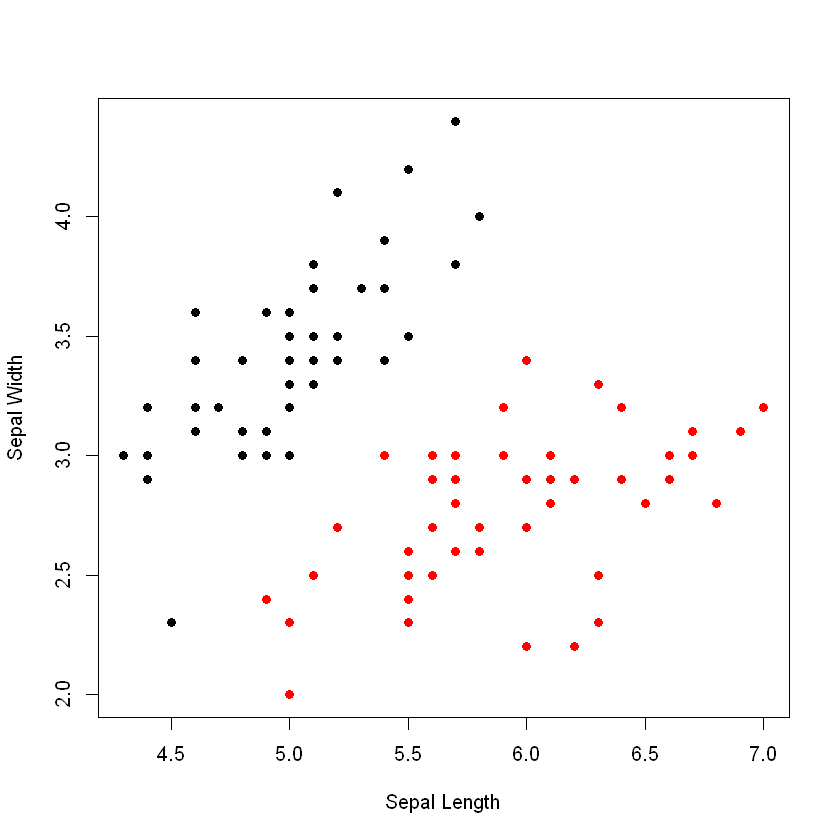

In [9]:
iris_data = iris[0:100,]
plot(iris_data$Sepal.Length, iris_data$Sepal.Width, 
     col = iris_data$Species, pch = 19, 
     xlab = "Sepal Length",
     ylab = "Sepal Width")

Let's simplify this further - say, we wanted to predict the species based on a single parameter - **Sepal Length**. Let's first plot it.

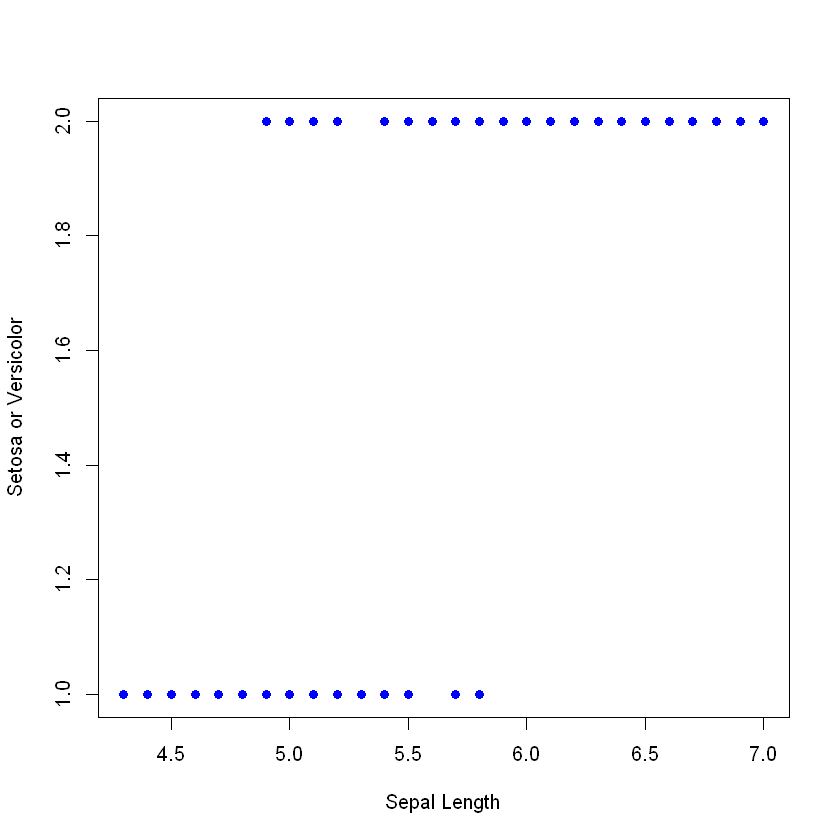

In [14]:
plot ( iris_data[,1], iris_data[,5],
       pch = 19, col = "blue",
       xlab = "Sepal Length",
       ylab = "Setosa or Versicolor")

We know that regression is used to predict a continous variable. What about a categorical variable like this ? (species). If we can draw a curve like this,

<img src="./pics/logit_function.jpg"/>

and for all target values predicted with value > 0.5 put it in one category, and for all target values less than 0.5, put it in the other category - like this.

<img src="./pics/setosa-vs-virginica.jpg"/>

A linear regression (multilinear in this case) equation looks like this.

# $y = m + a_1 X_1 + a_2 X_2 + a_3 X_3 .. $

Logistic regression is almost similar to linear regression. The difference lies in how the predictor is calculated. Let's see it in the next section.

<hr>

### Math

The name logistic regression is derived from the **logit** function. This function is based on odds. 

#### logit function

Let's take an example. A standard dice roll has 6 outcomes. So, what is the probability of landing a 4 ?

# $P_4 = \frac{Specific ~ Outcome} {Total ~ Number ~ of ~ Outcomes} =  \frac {1}{6}$

Now, what about odds ? The odds of landing a 4 is

# $Odds_4 = \frac{Probability ~ of ~ 4}{Probability ~ of ~ Everything ~ but ~ 4} = \frac{P_4}{1-P_4}$

$ where \hspace{0.5cm} P_4 = \frac {1}{6} $

So, when we substitute p into the odds equation, it becomes

# $ odds = \frac {\frac{1}{6}}{(1-\frac{1}{6})} = \frac{1}{5} = 0.2 $

OK. Now that we understand **Probability** and **Odds**, let's get to the **log** of odds. 

# $ log (odds ) = log ( \frac{P}{1-P}) $

How exactly is the logistic regression similar to linear regression ? Like so.

# $log ( \frac{P}{1-P}) = m + a_1 X_1 + a_2 X_2 + a_3 X_3 .. $

Where the predictor ( log of odds ) varies between ( -&infin; to +&infin; ). 

To understand this better, let's plot the log of odds between a probabilty value of 0 and 1. 

In [29]:
x = runif ( 100, min = 0.1, max = 0.9)
x = sort ( x )
y = log ( x / (1-x))

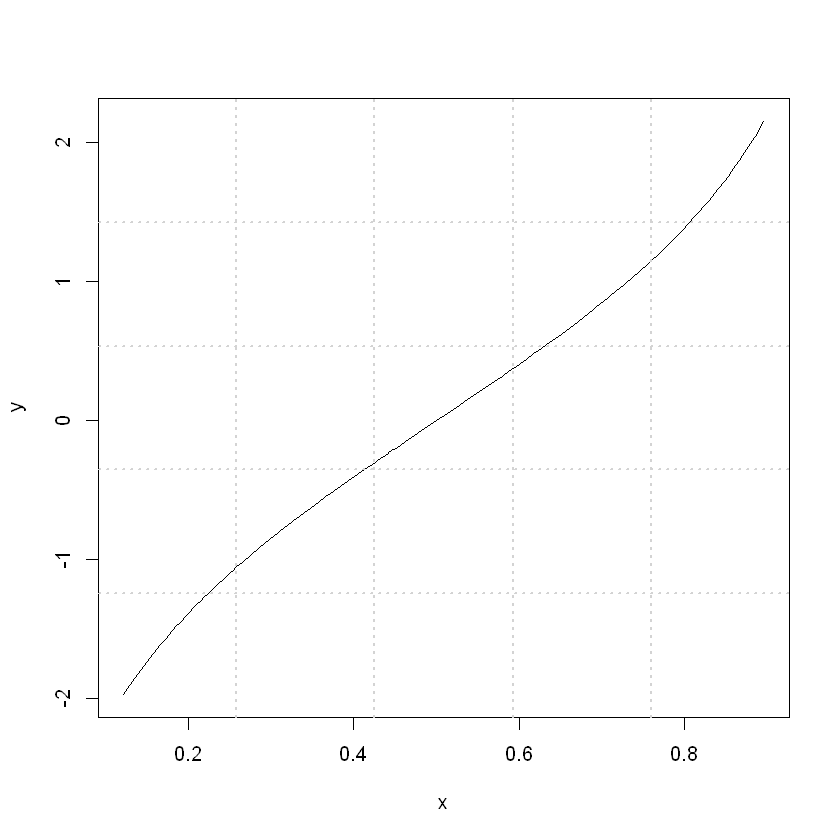

In [30]:
# plt.plot(x,y)
# plt.grid()

plot ( x, y , type="l")
grid(5, 5, lwd = 2)

This is the logistic regression curve. It maps a probability value ( 0 to 1 ) to a number ( -&infin; to +&infin; ).  However, we are not looking for a continous variable, right ? The predictor we are looking for is a categorical variable - in our case, we said we would be able to predict this based on probability. 

- p >= 0.5 - Category 1
- p < 0.5  - Category 2

In order to calculate those probabilities, we would have to calculate the inverse function of the **logit** function. 

<hr>

#### sigmoid function

The inverse of the logit curve is the *inverse-logit* or **sigmoid** function ( or **expit** function). The **sigmoid** function transforms the numbers ( -&infin; to +&infin; ) back to values between 0 and 1. Here is the formula for the **sigmoid** function.

# $sigmoid_x = \frac{1}{1+e^{\text{-x}}}$

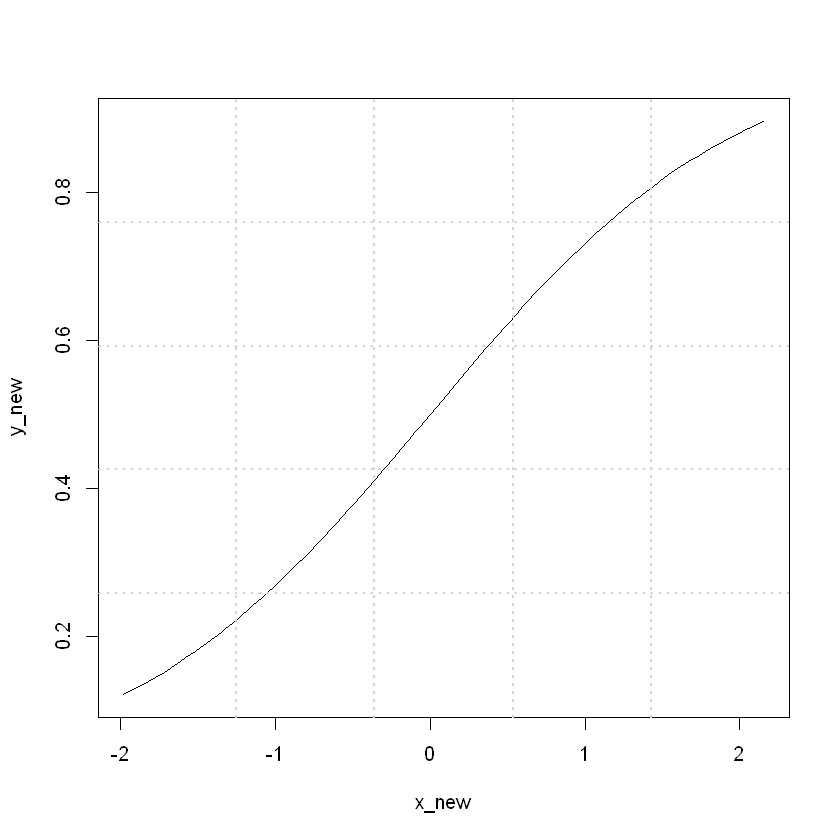

In [34]:
x_new = y
y_new = exp(x_new) / (1 + exp(x_new))

plot (x_new, y_new, type="l")
grid(5, 5, lwd = 2)

Essentially, if we flip the logit function 90<sup>0</sup>, you get the sigmoid function.

<img src="./pics/logit.png"/> <img src="./pics/sigmoid.png"/>

> Here is the trick - As long as we are able to find a curve like the one below, although the target (predictor) is a value between 0 and 1 ( probabilities), we can say that all values below 0.5 ( half way mark ) belongs to one category and the remaining ( values above 0.5 ) belong to the next category. This is the essence of logistic regression. 

<img src="./pics/setosa-vs-virginica.jpg"/>

<hr>

### Implementation

Let's try to implement the logistic regression function in R step by step. 

#### Data & Modeling

Just to keep the same example going, let's try to fit the sepal length data to try and predict the species as either _Setosa_ or _Versicolor_.

In [81]:
model = glm(Species ~ Sepal.Length + Sepal.Width, 
            data=iris_data, 
            family=binomial(link="logit"))

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [82]:
y_pred = predict(model, iris_data, type="response") 

In [83]:
y_pred

1            2            3            4            5            6 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
           7            8            9           10           11           12 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          13           14           15           16           17           18 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          19           20           21           22           23           24 
7.942647e-13 2.220446e-16 7.236536e-11 2.220446e-16 2.220446e-16 2.220446e-16 
          25           26           27           28           29           30 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          31           32           33           34           35           36 
2.220446e-16 7.236536e-11 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          37           38           39           40           41           42 
6.317944e-10 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 9.026645e-10 
          43           44           45           46           47           48 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          49           50           51           52           53           54 
2.220446e-16 2.220446e-16 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          55           56           57           58           59           60 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          61           62           63           64           65           66 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          67           68           69           70           71           72 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          73           74           75           76           77           78 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          79           80           81           82           83           84 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          85           86           87           88           89           90 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          91           92           93           94           95           96 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 
          97           98           99          100 
1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00

These are probability values. We need to convert them to the actual factors (setosa & versicolor), because, we are dealing with just 2 classes. We can just use a simple **ifelse ( )** syntax to convert all values > 0.5 to a versicolor and < 0.5 to a setosa.

In [91]:
y_pred_levels = as.factor(ifelse(y_pred>0.5,"versicolor","setosa"))

In [89]:
y_pred_levels

1          2          3          4          5          6          7 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
         8          9         10         11         12         13         14 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        15         16         17         18         19         20         21 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        22         23         24         25         26         27         28 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        29         30         31         32         33         34         35 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        36         37         38         39         40         41         42 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        43         44         45         46         47         48         49 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        50         51         52         53         54         55         56 
    setosa versicolor versicolor versicolor versicolor versicolor versicolor 
        57         58         59         60         61         62         63 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        64         65         66         67         68         69         70 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        71         72         73         74         75         76         77 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        78         79         80         81         82         83         84 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        85         86         87         88         89         90         91 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        92         93         94         95         96         97         98 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        99        100 
versicolor versicolor 
Levels: setosa versicolor

In [90]:
library(caret)

cm = confusionMatrix(y_pred_levels,iris_data[,5])
cm

Warning message in levels(reference) != levels(data):
"longer object length is not a multiple of shorter object length"
Warning message in confusionMatrix.default(y_pred_levels, iris_data[, 5]):
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0         0

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9638, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                    1.0               1.0               NA
Specificity                    1.0               1.0                1
Pos Pred Value                 1.0               1.0               NA
Neg Pred Value                 1.0               1.0               NA
Prevalence                     0.5            

<hr>

#### Evaluation

Let's split up the data into training and test data and model it. This time let's do the full iris dataset. Since there are 3 Species to be predicted, we cannot use glm with a "binomial" family algorithm. Let's use another library called **nnet**. As usual, to evaluate categorical target data, we use a confusion matrix. 

In [3]:
library(nnet)

In [4]:
index = sample(1:nrow(iris),nrow(iris)*.8)
train = iris[index,]
test  = iris[-index,]

In [5]:
model = multinom(Species~.,data = train)

# weights:  18 (10 variable)
initial  value 131.833475 
iter  10 value 11.516467
iter  20 value 4.881298
iter  30 value 4.469920
iter  40 value 4.263054
iter  50 value 3.911756
iter  60 value 3.823284
iter  70 value 3.598069
iter  80 value 3.591202
iter  90 value 3.570975
iter 100 value 3.570835
final  value 3.570835 
stopped after 100 iterations


In [6]:
pred = predict(model,test)

As usual, to evaluate categorical target data, we use a confusion matrix. 

In [9]:
library(caret)

cm = confusionMatrix(pred, as.factor(test$Species))
cm

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         16          0         0
  versicolor      0          8         1
  virginica       0          2         3

Overall Statistics
                                          
               Accuracy : 0.9             
                 95% CI : (0.7347, 0.9789)
    No Information Rate : 0.5333          
    P-Value [Acc > NIR] : 1.989e-05       
                                          
                  Kappa : 0.8315          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8000           0.7500
Specificity                 1.0000            0.9500           0.9231
Pos Pred Value              1.0000            0.8889           0.6000
Neg Pred Value              1.0000            0.9048           0.9600
P

That's a 84% score. 

<hr>

### Optimization

Let's plot the logistic regression curve for the test data set.

**Step 1** - Get the data

In [97]:
iris_data = iris[51:150,]
iris_data = iris_data[order(iris_data$Sepal.Length),]
head(iris_data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
58,4.9,2.4,3.3,1.0,versicolor
107,4.9,2.5,4.5,1.7,virginica
61,5.0,2.0,3.5,1.0,versicolor
94,5.0,2.3,3.3,1.0,versicolor
99,5.1,2.5,3.0,1.1,versicolor
60,5.2,2.7,3.9,1.4,versicolor


**Step 2** - Model the data using a classifier

In [98]:
model = glm( Species ~ Sepal.Length, data = iris_data , family = binomial)

**Step 3** - Plot the Logit curve.

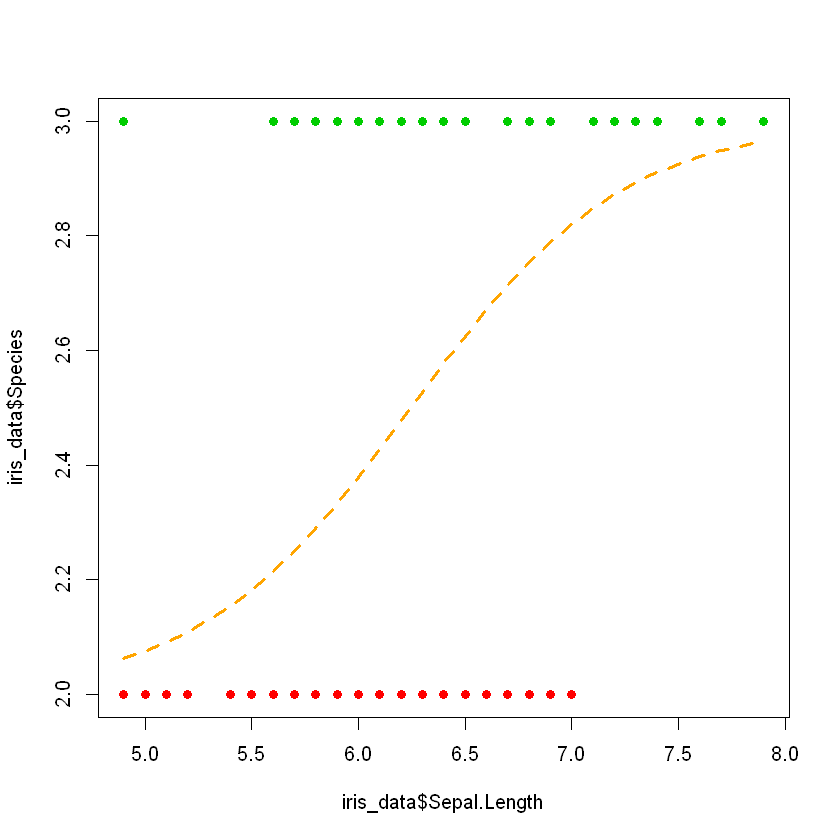

In [100]:
library(pROC)

plot( iris_data$Sepal.Length, iris_data$Species, pch = 19, col = iris_data$Species)

points ( iris_data$Sepal.Length, model$fitted.values + 2, col = "orange", type="l", lty=2, lwd=3)

<img src="./pics/tp-fp.png"/>

As you can see, still there are quite a bit of mis-classifications. All the **false negatives** and **false positives** in the plot above are examples of mis-classification. Irrespective of the algorithm used to calculate the fit, there is only so much that can be done in increasing the classification accuracy given the data as-is. Other terms for **True Positive** and **True Negative** are

- **Sensitivity** ( True Positive )
- **Specificity** ( True Negative )


There is a specific optimization that can be done - and that is to specifically increase accuracy of one segment of the confusion matrix at the expense of the other segments. For example, if you look at a visual of the confusion matrix for our dataset.

<img src="./pics/confusion-matrix-visual.png"/>

For this dataset, classifying the species as "setosa" is positive and "versi-color" as negative.

- setosa - positive
- versi-color - negative

Let's actuall calculate the accuracy values. Say the confusion matrix looks like this.

In [109]:
tp = (11) / (11 + 1)
fp = (1)  / (11 + 1)
fn = (1)  / (1 + 12)
tn = (12) / (12 + 1)

cat ("True Positive = ", tp, "\n")
cat ("False Positive = ", fp, "\n")
cat ("True Negative = ", tn, "\n")
cat ("False Negative = ", fn, "\n")

True Positive =  0.9166667 
False Positive =  0.08333333 
True Negative =  0.9230769 
False Negative =  0.07692308 


<img src="./pics/confusion-matrix-probabilities.png"/>

What if we want to predict 100% of setosa ( or a much more accurate classification than 0.9 ). Of course, like we discussed earlier, it will come at a cost. However, there is a usecase for this scenario. For example, if getting a particular classification right is extremely important, then we focus more on that particular classification than the others. Have you seen the Brad Pitt's movie "World War Z" ? A plague emerges all around the world and an asylum is set up in Israel with a high wall. However, when you enter the wall, they make absolutely sure that you do not have the plague. Say, if you have the plague and if you call that as positive, then essentially you maximize the green box in the picture above.

Or another example would be, if you were to diagonize cancer patients, you would rather want to increase the odds of predicting a cancer patient if he/she really has it (True positive). Even it it comes at a cost of wrongly classifying a non-cancer patient as positive ( false positive ). The former can save a life while the later will just cost the company a patient. 

<hr>

### Evaluation

#### ROC Curve

Receiver Operating Characteristics - also called ROC Curve is a measure of how good the classification is. Scikit Learn has an easy way to create ROC curve and calculate the area under the ROC curve. First off, let's start with a classifier like Logistic Regression

**Step 1** - Get the data

Setting levels: control = 0, case = 1

Setting direction: controls < cases



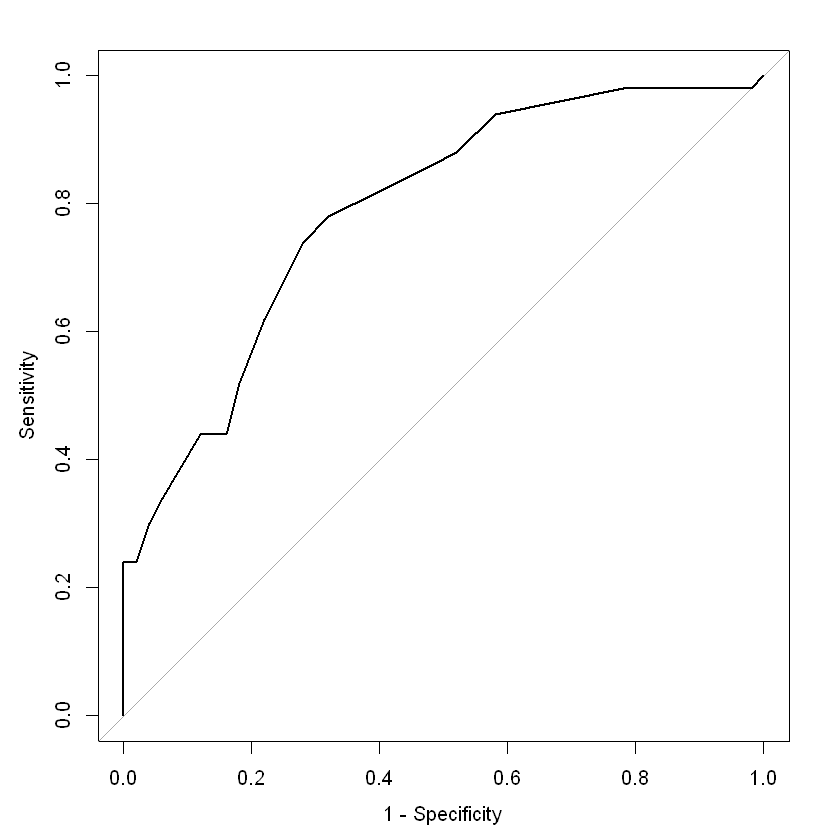

In [125]:
iris_data = iris[51:150,]
iris_data = iris_data[order(iris_data$Sepal.Length),]
model = glm( Species ~ Sepal.Length, data = iris_data , family = binomial)
library(pROC)

# iris$Species has 3 classes and hence 3 factors. So, we are converting them to
# 0/1 factor using factor (c(iris_data$Species) - 2). 
# -2 so that 3,2 become 1,0
roc = roc ( factor (c(iris_data$Species) - 2), model$fitted.values, plot = TRUE, legacy.axes = TRUE)

Area under the curve is an indicator of how accurate our classifier is. You can get it as follows. 

In [126]:
roc$auc

Area under the curve: 0.7896

### Reference

- <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression"> Scikit Learn Implementation details of Logistic Regression </a>

- <a href="https://ajaytech.co/roc-curve"> Receiver Operating Characteristics (ROC) Curve from scratch </a>